<a href="https://colab.research.google.com/github/Dasyud/BCI_GCN/blob/main/bci_project_gigadb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!tar -xvf '/content/drive/MyDrive/Colab Notebooks/data/EMG_ConvertedData.tar.gz'

EMG_ConvertedData/
EMG_ConvertedData/EMG_session2_sub11_multigrasp_MI.mat
EMG_ConvertedData/EMG_session3_sub15_reaching_MI.mat
EMG_ConvertedData/EMG_session3_sub14_multigrasp_MI.mat
EMG_ConvertedData/EMG_session3_sub8_twist_MI.mat
^C


In [7]:
!pip install visibility_graph
!pip install PyWavelets
!pip install ts2vg
!pip install ewtpy
#!pip install igraph
!pip install networkx
!pip install stellargraph

In [8]:
from visibility_graph import visibility_graph
import pywt
import ewtpy
import tensorflow as tf
from scipy.io import loadmat
import os
import pandas as pd
import numpy as np
import ts2vg
#import igraph
import matplotlib.pyplot as plt
import networkx as nx
from stellargraph import StellarGraph

In [9]:
#HYPERPARAMETERS
directory = '/content/EMG_ConvertedData'
segment_size = 1024

In [10]:

for file_name in os.listdir(directory):

  # CONVERTING MAT FILES TO PANDAS DATAFRAMES
  file_data = loadmat(os.path.join(directory, file_name))
  # print(file_data)
  # df = pd.DataFrame([file_data])
  file_data.keys()
  file_data = {k:v for k, v in file_data.items() if k[0] == 'c'}                #EXTRACTING CHANNELS (CH1, CH2, etc)
  channels = pd.DataFrame({k: np.array(v).flatten() for k, v in file_data.items()})
  list_of_graphs = []
  N = len(channels.index)
  # print(N)
  N = 100                                                                   #Cutting data coz we got no RAM

  #BREAKING CHANNELS INTO SEGMENTS AND CONVERTING SEGMENTS TO GRAPHS. THEN SAVING THEM IN LIST OF GRAPHS
  # for channel in channels:
  #   for i in range(0, N, segment_size):
  #     curr_channel = channels[channel][i:i+segment_size]
  #     channel_graph = ts2vg.NaturalVG(weighted='distance')
  #     print(curr_channel)
  #     channel_graph.build(curr_channel)
  #     list_of_graphs.append(channel_graph)
  #   break
  break


  # channels = tf.convert_to_tensor(df.values)
  # print(channels)
  # channels.size()



In [8]:
print(channels)

           ch1    ch2   ch3    ch4    ch5    ch6    ch7
0           71     71   -63     63    -72     71    -72
1           65     65   -58     58    -66     65    -65
2           97     97   -86     86    -98     97    -98
3          146    146  -131    130   -148    146   -147
4          203    203  -180    181   -205    203   -204
...        ...    ...   ...    ...    ...    ...    ...
3894795  28568  29372 -5089  25253 -21284  30439 -12118
3894796  28567  29372 -5097  25253 -21286  30438 -12120
3894797  28567  29370 -5111  25252 -21289  30438 -12122
3894798  28565  29368 -5130  25250 -21293  30436 -12127
3894799  28563  29365 -5155  25248 -21299  30435 -12134

[3894800 rows x 7 columns]


(3894800,)


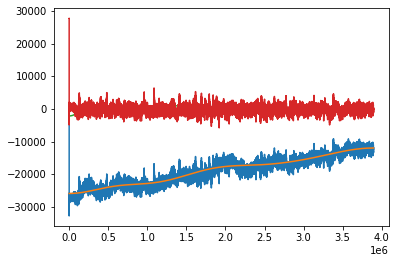

In [9]:
#%% Example script

T = 1000
t = np.arange(1,T+1)/T
f = np.cos(2*np.pi*0.8*t) + 2*np.cos(2*np.pi*10*t)+0.8*np.cos(2*np.pi*100*t)
ewt, mfb, boundaries = ewtpy.EWT1D(channels["ch7"].to_numpy(), N = 3)
plt.plot(channels["ch7"])
plt.plot(ewt)
print((channels["ch7"].to_numpy().shape))

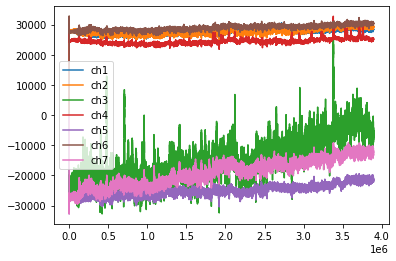

In [10]:
channels.plot()

In [11]:
ewt, mfb, boundaries = ewtpy.EWT1D(channels["ch1"], N = 5, log = 0, detect = "locmax", completion = 0, reg = 'average', lengthFilter = 10, sigmaFilter = 5)

In [12]:
ewt.shape

(3894800, 5)

In [13]:
ewt[0]

array([ 27125.39798466,    312.70461541,   -213.69882257,     89.56761327,
       -27185.57349555])

In [16]:
pd.DataFrame(ewt).iloc[:, 0]

0          27125.397985
1          27125.397985
2          27125.397985
3          27125.397985
4          27125.397985
               ...     
3894795    28494.349899
3894796    28494.349899
3894797    28494.349899
3894798    28494.349899
3894799    28494.349899
Name: 0, Length: 3894800, dtype: float64

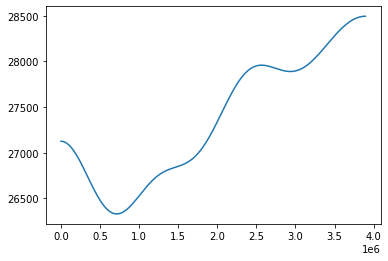

In [17]:
plt.plot(pd.DataFrame(ewt).iloc[:, 0])

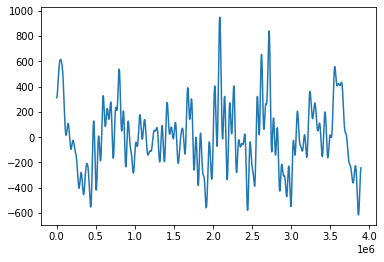

In [18]:
plt.plot(pd.DataFrame(ewt).iloc[:, 1])

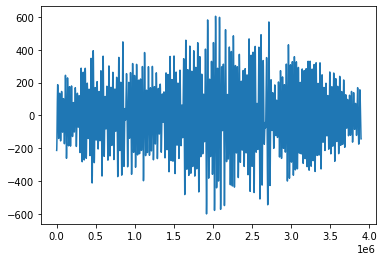

In [19]:
plt.plot(pd.DataFrame(ewt).iloc[:, 2])

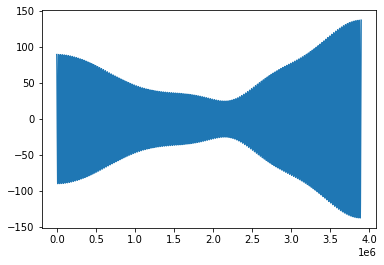

In [20]:
plt.plot(pd.DataFrame(ewt).iloc[:, 3])

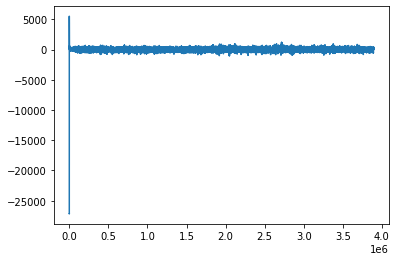

In [21]:
plt.plot(pd.DataFrame(ewt).iloc[:, 4])

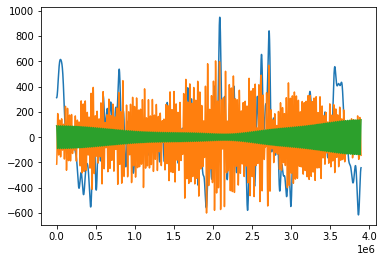

In [22]:
#plt.plot(ewt[:, 0])
plt.plot(ewt[:, 1])
plt.plot(ewt[:, 2])
plt.plot(ewt[:, 3])
#plt.plot(ewt[:, 4])

In [23]:
print(ewt[200000:201024, 4])

[291.7011613  282.72844639 273.7578637  ... 323.300754   326.32405567
 328.35165882]


In [29]:
# CONVERTING EWT OUTPUT TO VISIBILITY GRAPHS
print("test")

test


In [33]:
series = ewt[200000:201024, 4]
g = visibility_graph(series)

In [42]:
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

Text(0.5, 1.0, 'Visibility Graph')

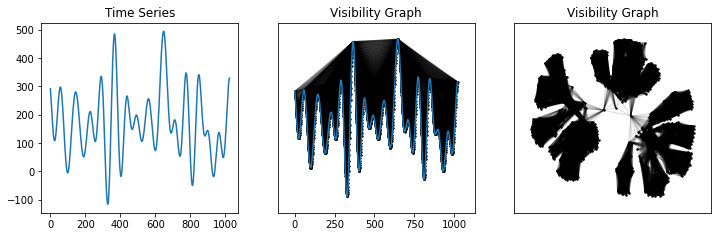

In [25]:
from ts2vg import NaturalVG
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Brownian motion series
rng = np.random.default_rng(110)
#ts = rng.standard_normal(size=200)
ts = ewt[200000:201024, 4]
#ts = np.cumsum(ts)

# 2. Build visibility graph
g = NaturalVG(directed=None).build(ts)
nxg = g.as_networkx()

# 3. Make plots
fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(ts)
ax0.set_title('Time Series')

graph_plot_options = {
    'with_labels': False,
    'node_size': 2,
    'node_color': [(0, 0, 0, 1)],
    'edge_color': [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg, ax=ax1, pos=g.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(ts)
ax1.set_title('Visibility Graph')

nx.draw_networkx(nxg, ax=ax2, pos=nx.kamada_kawai_layout(nxg), **graph_plot_options)
ax2.set_title('Visibility Graph') 

In [27]:
#code for plotgraphdemo
from ts2vg import NaturalVG, HorizontalVG
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.patches import ArrowStyle, FancyArrowPatch


def plot_graph_demo(g, ax, title=None, weights_cmap='coolwarm_r', weights_range=(-3.5, 3.5), cbar_ax=None, arrow_heads='auto'):
    """
    Draw a simple plot of a time series and its corresponding visibility graph for demonstration purposes.
    Only practical for small graphs (smaller than ~20 nodes).

    Parameters
    ----------
    g : ts2vg.graph.BaseGraph
        Graph object.

    ax : Matplotlib ``Axes``
        Axes where to plot.

    title : str, None
        Plot title. Default ``None``.

    weights_cmap : str, Matplotlib ``Colormap`` object
        Colormap for coloring graph edges based on weight.
        Ignored for unweighted graphs.

    weights_range : tuple
        Range (min, max) used to normalize the coloring of the edge weights.
        Ignored for unweighted graphs.

    cbar_ax : Matplotlib ``Axes`` object
        Axes where to draw the colorbar.
        Ignored for unweighted graphs.

    arrow_heads: 'auto', bool
        Whether to draw arrow heads on the edges.
        If 'auto', will be based on the graph type.
    """
    color_mappable = ScalarMappable(norm=Normalize(*weights_range), cmap=weights_cmap)

    bars = ax.bar(g.xs, g.ts, color='#ccc', edgecolor="#000", width=0.3)
    ax.set_xticks(g.xs)

    if arrow_heads is False or (arrow_heads == 'auto' and not g.is_directed):
        arrowstyle = ArrowStyle('-')
    elif g.is_directed:
        arrowstyle = ArrowStyle('-|>', head_length=6, head_width=3)
    else:
        arrowstyle = ArrowStyle('<|-|>', head_length=6, head_width=3)

    if g.is_weighted:
        if cbar_ax is not None:
            cbar_ax.get_figure().colorbar(color_mappable, cax=cbar_ax, orientation='vertical', aspect=30, pad=0.05)
        else:
            ax.get_figure().colorbar(color_mappable, ax=ax, orientation='vertical', aspect=30, pad=0.05)

    for (n1, n2, *w) in g.edges:
        if type(g) == NaturalVG:
            x1, y1 = g.xs[n1], g.ts[n1]
            x2, y2 = g.xs[n2], g.ts[n2]
        elif type(g) == HorizontalVG:
            y = min(g.ts[n1], g.ts[n2])

            if n1 < n2:
                x1, y1 = g.xs[n1] + bars[n1].get_width()/2, y
                x2, y2 = g.xs[n2] - bars[n2].get_width()/2, y
            else:
                x1, y1 = g.xs[n1] - bars[n1].get_width()/2, y
                x2, y2 = g.xs[n2] + bars[n2].get_width()/2, y
        else:
            raise ValueError(f"Visibility graph type {type(g)} not recognized for plotting.")

        arrow = FancyArrowPatch(
            (x1, y1), (x2, y2),
            arrowstyle=arrowstyle,
            shrinkA=0, shrinkB=0,
            color=color_mappable.to_rgba(*w, alpha=1) if g.is_weighted else (0.25, 0.25, 0.25, 0.7),
            linewidth=2,
        )

        ax.add_patch(arrow)

    if title is not None:
        ax.set_title(title)

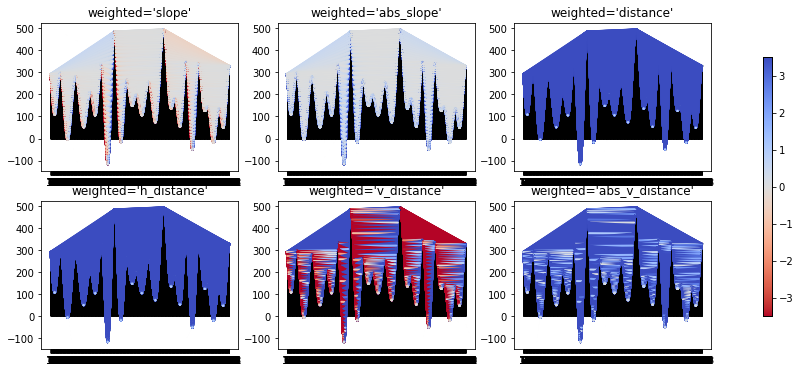

In [28]:

weight_options = [
    'slope',
    'abs_slope',
    'distance',
    'h_distance',
    'v_distance',
    'abs_v_distance',
]

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 6))
cbar_ax = fig.add_axes([0.96, 0.2, 0.01, 0.6])

for w, ax in zip(weight_options, axs.flat):
    g = NaturalVG(weighted=w).build(ts)
    plot_graph_demo(g, ax=ax, title=f"weighted='{w}'", cbar_ax=cbar_ax)

In [16]:

for file_name in os.listdir(directory):

  # CONVERTING MAT FILES TO PANDAS DATAFRAMES
  file_data = loadmat(os.path.join(directory, file_name))
  # print(file_data)
  #df = pd.DataFrame([file_data])
  file_data.keys()
  file_data = {k:v for k, v in file_data.items() if k[0] == 'c'}                #EXTRACTING CHANNELS (CH1, CH2, etc)
  channels = pd.DataFrame({k: np.array(v).flatten() for k, v in file_data.items()})
  list_of_graphs = []
  N = len(channels.index)
  #print(N)
  #N = 1                                                                 #Cutting data coz we got no RAM

  #BREAKING CHANNELS INTO SEGMENTS AND CONVERTING SEGMENTS TO GRAPHS. THEN SAVING THEM IN LIST OF GRAPHS
  for channel in channels:
    for i in range(0, N, segment_size):
      curr_segment = channels[channel][i:i+segment_size]
      segment_graph = ts2vg.NaturalVG(weighted='distance')
      #print(curr_segment)
      segment_graph.build(curr_segment)
      nx_graph = segment_graph.as_networkx()
      #list_of_graphs.append(segment_graph)
    break
  break


  # channels = tf.convert_to_tensor(df.values)
  # print(channels)
  # channels.size()



In [21]:
print(len(channels.index))

3823900


In [22]:
sg = StellarGraph.from_networkx(nx_graph)
print(sg.info())

StellarGraph: Undirected multigraph
 Nodes: 284, Edges: 5662

 Node types:
  default: [284]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [5662]
        Weights: range=[1, 116.559], mean=43.9371, std=26.2909
        Features: none


In [13]:
print(len(channels.index))

3823900


In [38]:
g = NaturalVG(weighted='distance').build(ts)

In [39]:
type(g)

ts2vg.graph.natural.NaturalVG

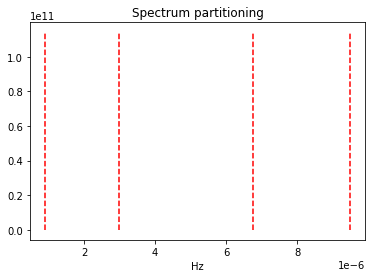

In [26]:
ff = np.fft.fft(channels["ch1"].to_numpy())
freq = 2*np.pi*np.arange(0,len(ff))/len(ff)

freq = freq*1/(2*np.pi)
boundariesPLT = boundaries*1/(2*np.pi)

ff = abs(ff[:ff.size//2])#one-sided magnitude
freq = freq[:freq.size//2]

plt.figure()
#plt.plot(freq,ff)
for bb in boundariesPLT:
    plt.plot([bb,bb],[0,max(ff)],'r--')
plt.title('Spectrum partitioning')
plt.xlabel('Hz')
plt.show()

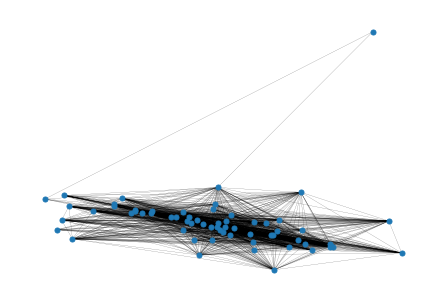

In [ ]:
ig = list_of_graphs[0].as_networkx()
# subax1 = plt.subplot(121)
options = {
    'node_color': 'black',
    'node_size': 1.0,
    'width': 3,
}
nx.draw(ig, with_labels=False, node_size=25, width=0.125)

In [ ]:
ch6_npy = np.array(df["ch6"])

In [ ]:
ch6 = torch.from_numpy(ch6_npy)

In [ ]:
!cp '/content/EMG_ConvertedData/EMG_session1_sub1_reaching_realMove.mat' "/content/drive/MyDrive/Colab Notebooks/data"